d:\big_data_test\envi\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


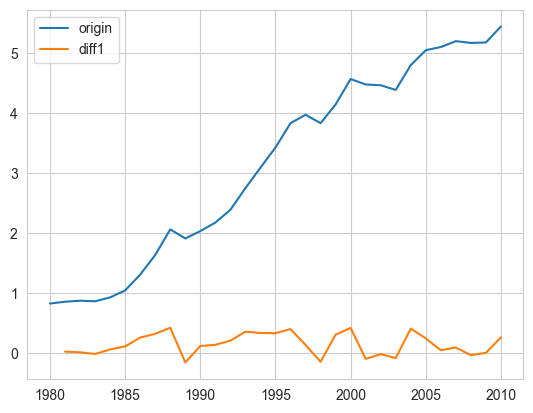

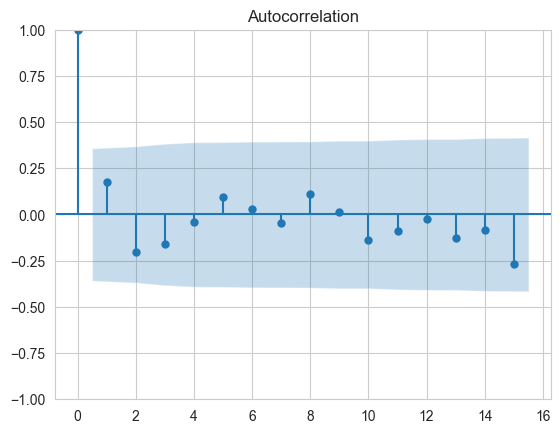

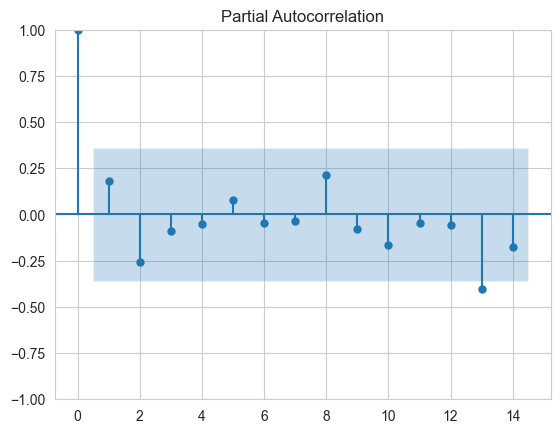

In [1]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
# @ author: Koorye
# @ date: 2021-7-29
# @ function: ARIMA 模型

# %%

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# %%

# 源数据
df = pd.DataFrame({
    'year': [i for i in range(1980, 2011)],
    'val': [0.82989428, 0.85951092, 0.87668916, 0.86670716, 0.932052,
            1.04826364, 1.3111932, 1.63756228, 2.0641074, 1.91268276,
            2.03544572, 2.17721128, 2.38968344, 2.75059208, 3.0906664,
            3.42664028, 3.83064908, 3.97190864, 3.83160036, 4.143101,
            4.566551, 4.47541, 4.462796, 4.384829, 4.796861,
            5.046211, 5.098759, 5.196519, 5.166843, 5.174744,
            5.440894],
})

# %%

# 作一阶差分
df['val_diff1'] = df['val'].diff()
plt.plot(df['year'], df['val'], label='origin')
plt.plot(df['year'], df['val_diff1'], label='diff1')
plt.legend()

# %%

# ACF 图
plot_acf(df['val_diff1'][1:])

# %%

# PACF 图
plot_pacf(df['val_diff1'][1:], lags=14)

# %%

# 参考 ACF 和 PCAF 代入 p,q
str_list = []
for p in range(1, 4):
    for q in range(0, 4):
        model = ARIMA(df['val'], order=(p, 1, q))
        res = model.fit(disp=0)
        str_list.append('p = {}, q = {}, aic = {}'.format(p, q, res.aic))
for each in str_list:
    print(each)

# %%

# p=2,q=0 使 aic 最小
model = ARIMA(df['val'], order=(2, 1, 0))
res = model.fit(disp=0)
res.summary()

# %%

# 作预测图
res.plot_predict(end=40)